# Postal Handwriting Recognition Project

This project aims to recognise and classify images of numbers collected from parcels

In [16]:
from lab3lib import load_data, show_single_face, show_faces, partition_data, split_left_right, join_left_right, show_split_faces
import numpy as np
import matplotlib.pyplot as plt

In [17]:
# Import data and labels
data, labels = load_data()

[3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3]


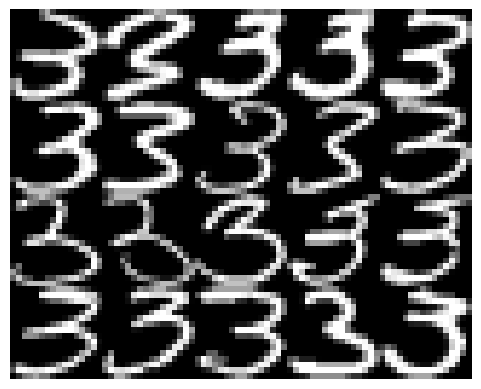

In [18]:
# Seeing if the imported data is correct
show_faces(data[1000:1020], 5, 16, 16)
print(labels[1000:1020])

In [19]:
# Split data into three components (training, validation and testing)
tr_ind, te_ind = partition_data(labels, num_per_class=400)
tr_data = data[tr_ind]
tr_labels = labels[tr_ind]
te_data = data[te_ind]
te_labels = labels[te_ind]

In [20]:
# Use linear SVM to train a predict data, calculating its accuracy
from sklearn.svm import LinearSVC
lsvc = LinearSVC(max_iter=5000)

lsvc.fit(tr_data, tr_labels)
score = lsvc.score(te_data, te_labels)
print("Linear Support Vector Classification Score: ", score)

Linear Support Vector Classification Score:  0.861


c:\Users\chuon\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Predicted Output:  [1 1 2 2 8 3 4 1 5 5 6 5 7 7 8 8 9 9 0 0]
Actual Output:     [1 1 2 2 3 3 4 4 5 5 6 6 7 7 8 8 9 9 0 0]


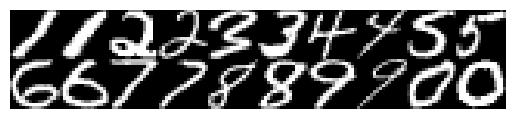

In [21]:
# Linear SVC predict OUTPUT
output = lsvc.predict(te_data[::50])
show_faces(te_data[::50], 10, 16, 16)
print("Predicted Output: ", output)
print("Actual Output:    ", te_labels[::50])

In [22]:
# Use Kernel SVM to predict the values
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))
clf.fit(tr_data, tr_labels)

score = clf.score(te_data, te_labels)
print("Kernel SVM Classification Score: ", score)

Kernel SVM Classification Score:  0.976


Predicted Output:  [1 1 2 2 8 3 4 4 5 5 6 6 7 7 8 8 9 9 0 0]
Actual Output:     [1 1 2 2 3 3 4 4 5 5 6 6 7 7 8 8 9 9 0 0]


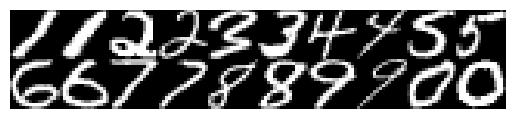

In [23]:
# Linear SVC predict OUTPUT
output = clf.predict(te_data[::50])
show_faces(te_data[::50], 10, 16, 16)
print("Predicted Output: ", output)
print("Actual Output:    ", te_labels[::50])